In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
project_root = os.path.abspath("")
if project_root not in sys.path:
    sys.path.append(project_root)
import pandas as pd
import numpy as np 
from pathlib import Path
import utils.metrics_utils
from utils.metrics_utils import * 
from utils.visualization_utils import *
from utils.visualization_utils import _load_tracking_and_behavior
import harp
from ipywidgets import widgets
from IPython.display import display
import moviepy
%matplotlib widget

# 1. Metrics Visualization

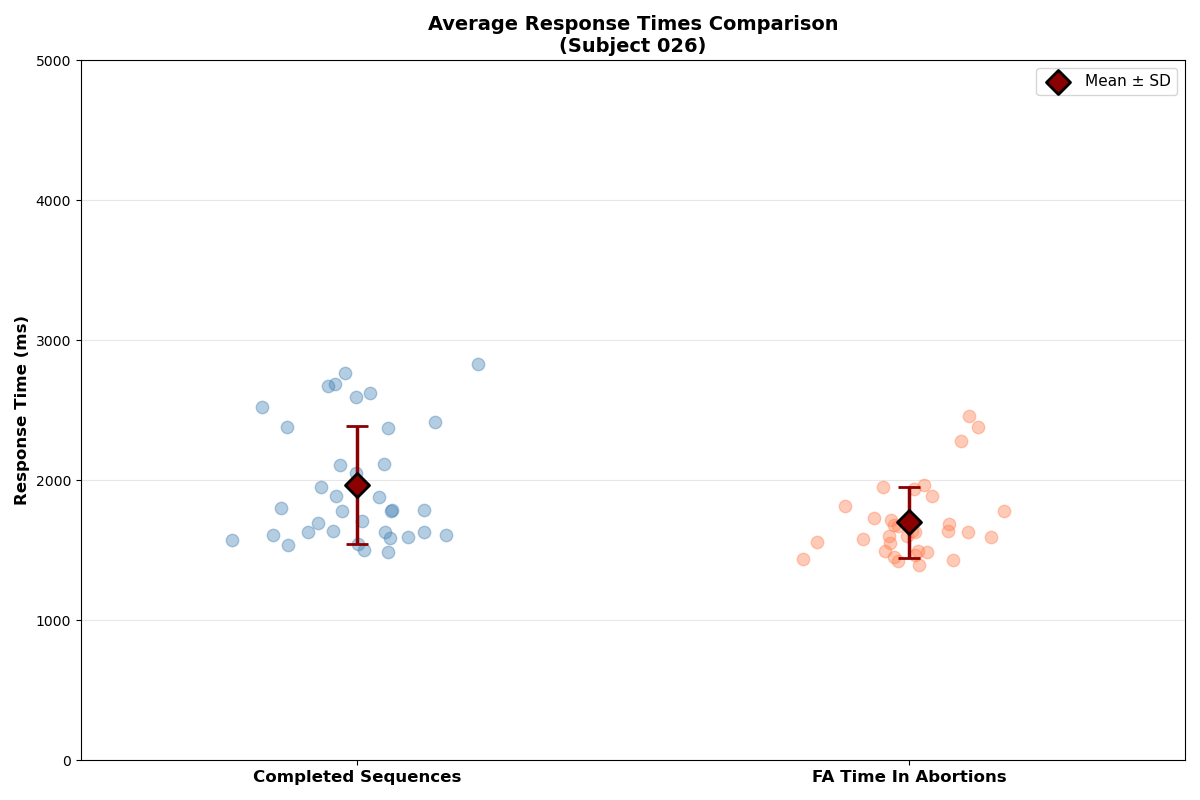

In [46]:
fig, ax = plot_response_times_completed_vs_fa(26, dates=(20250811, 20251010), y_limit=5000)

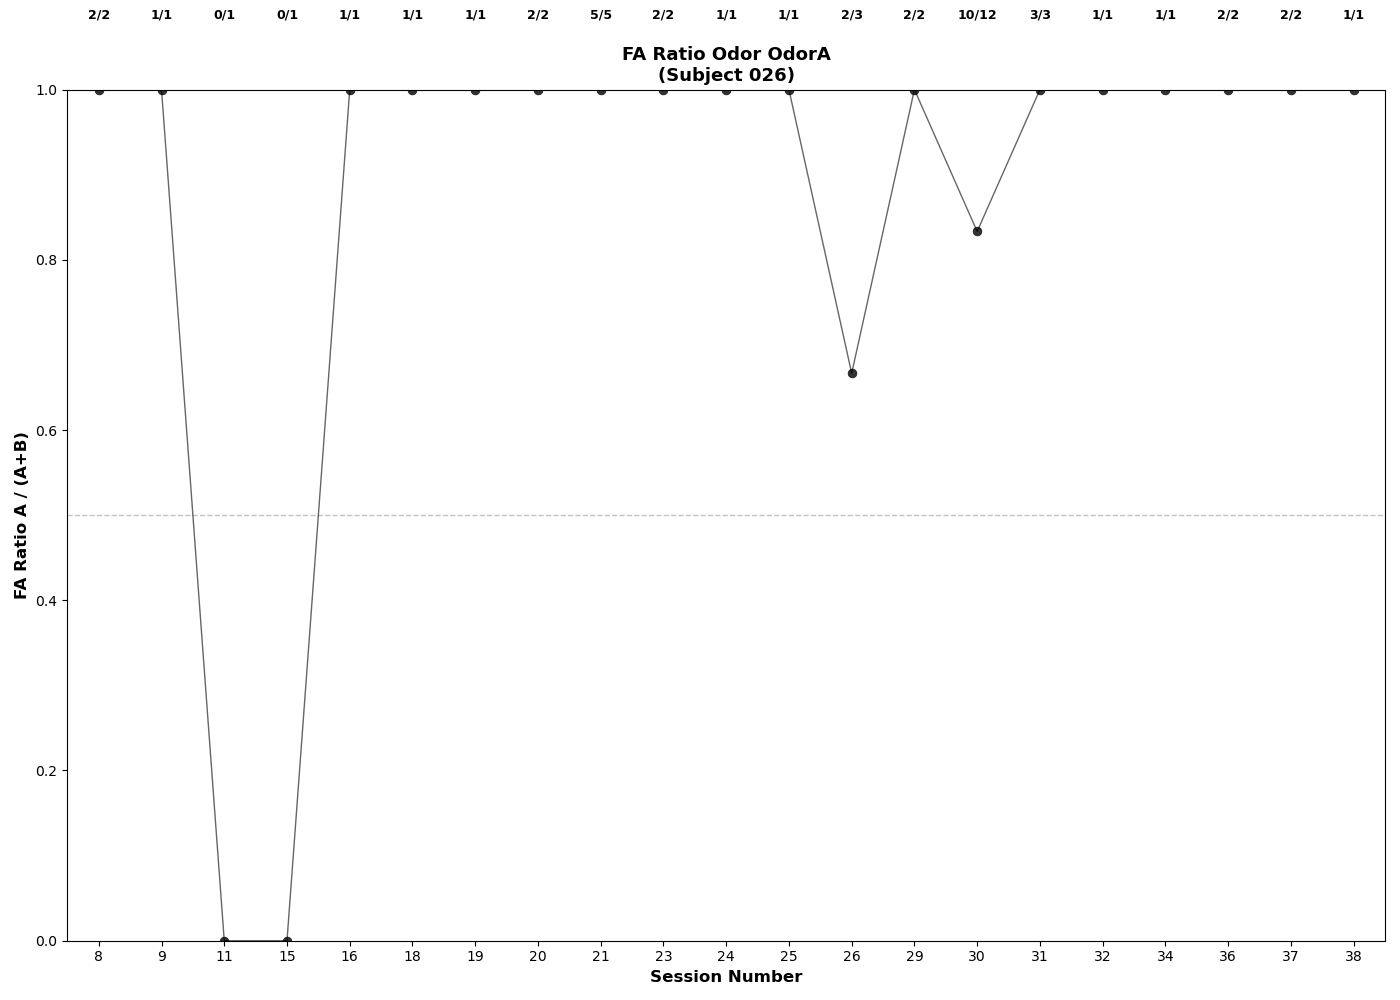

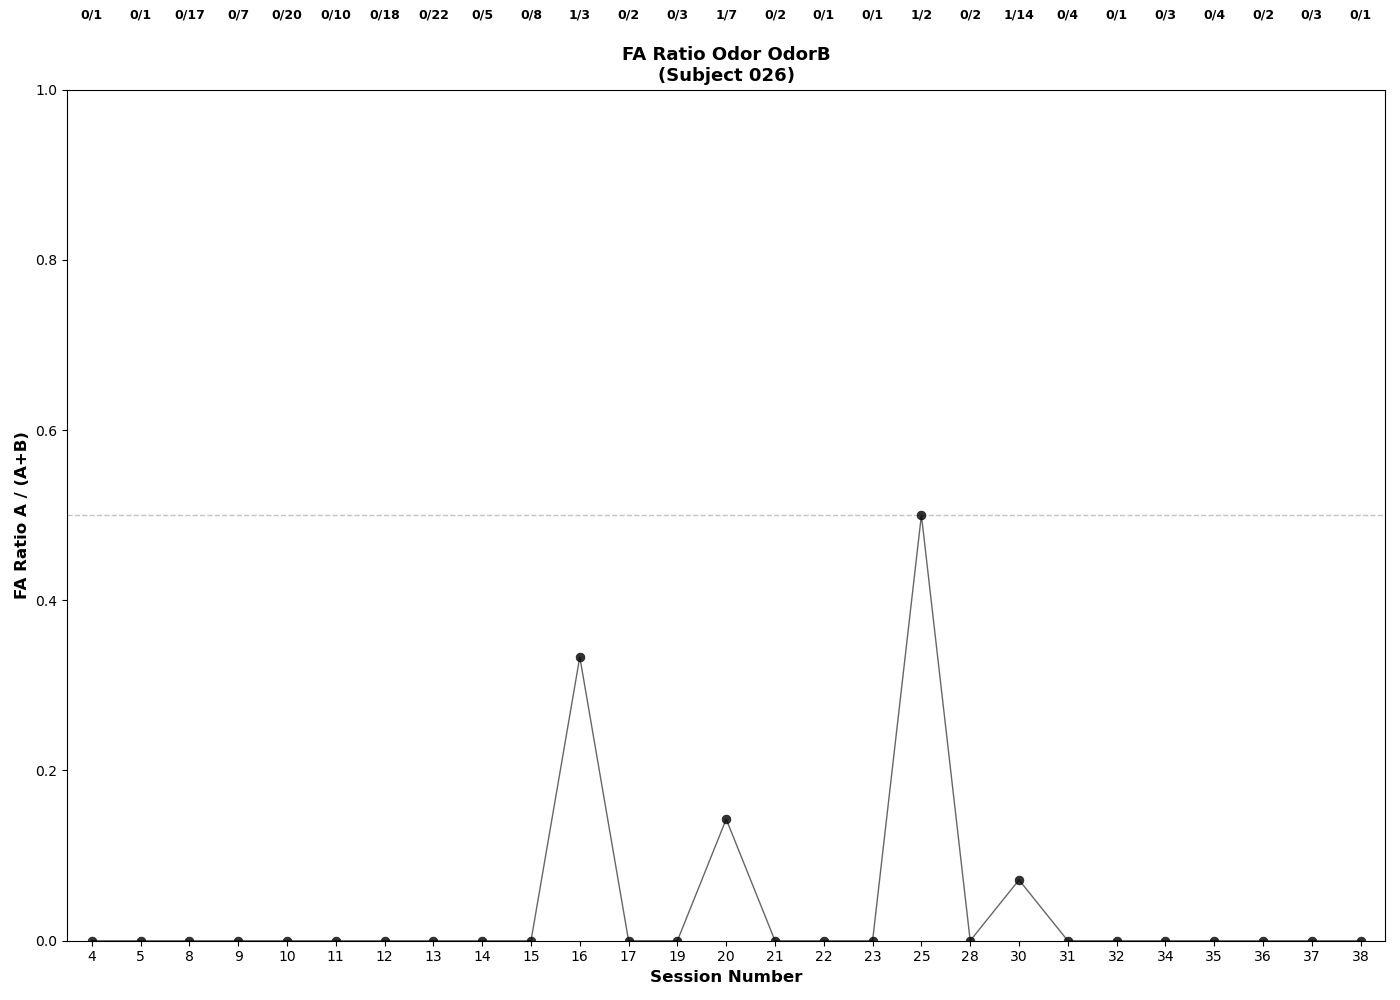

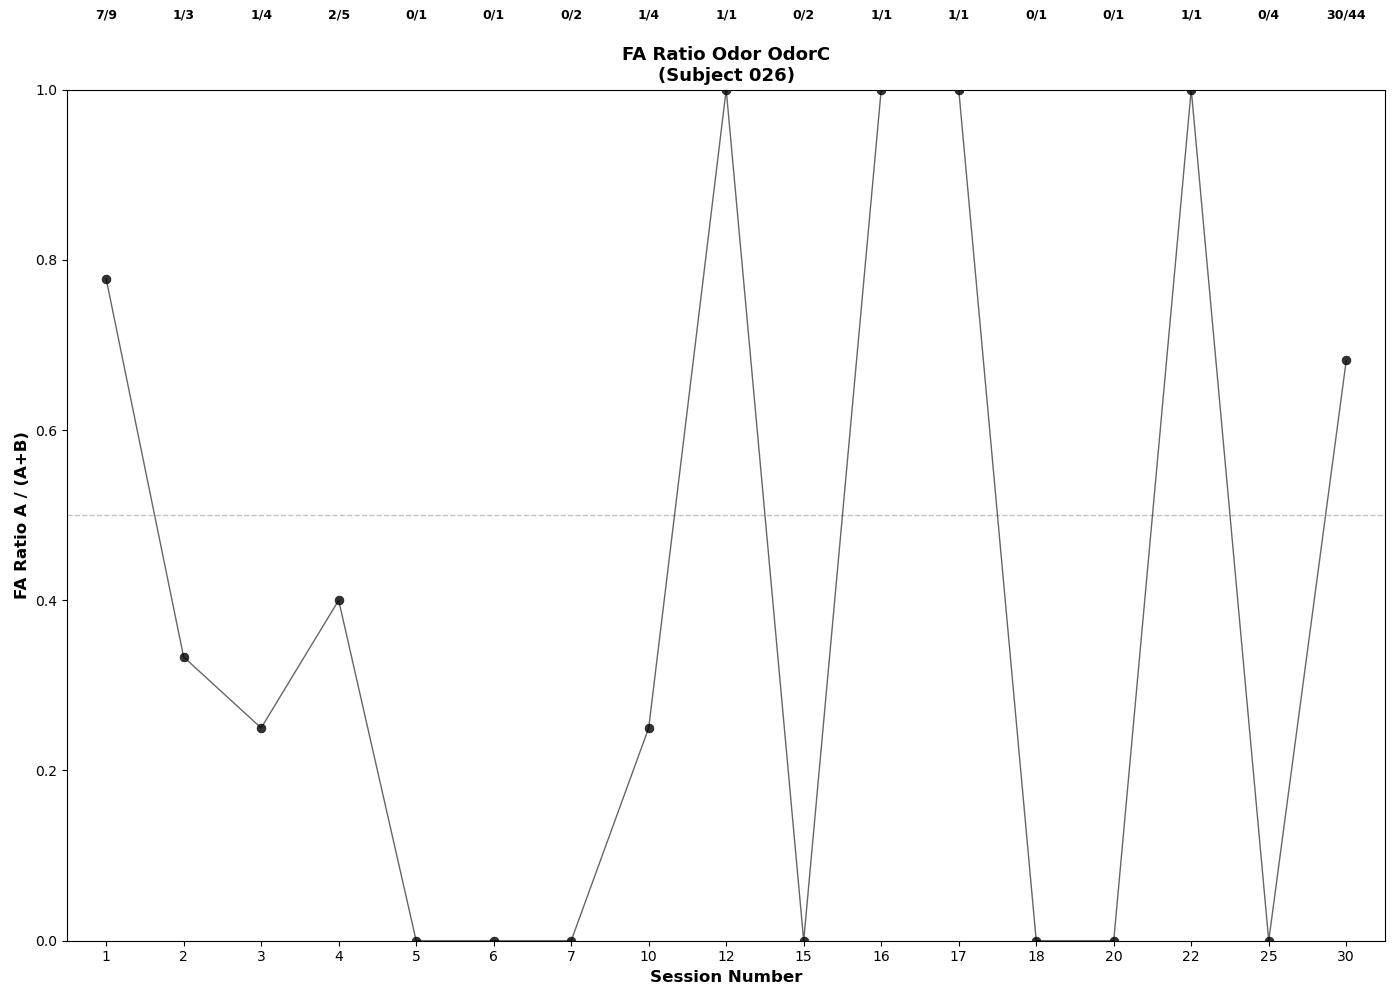

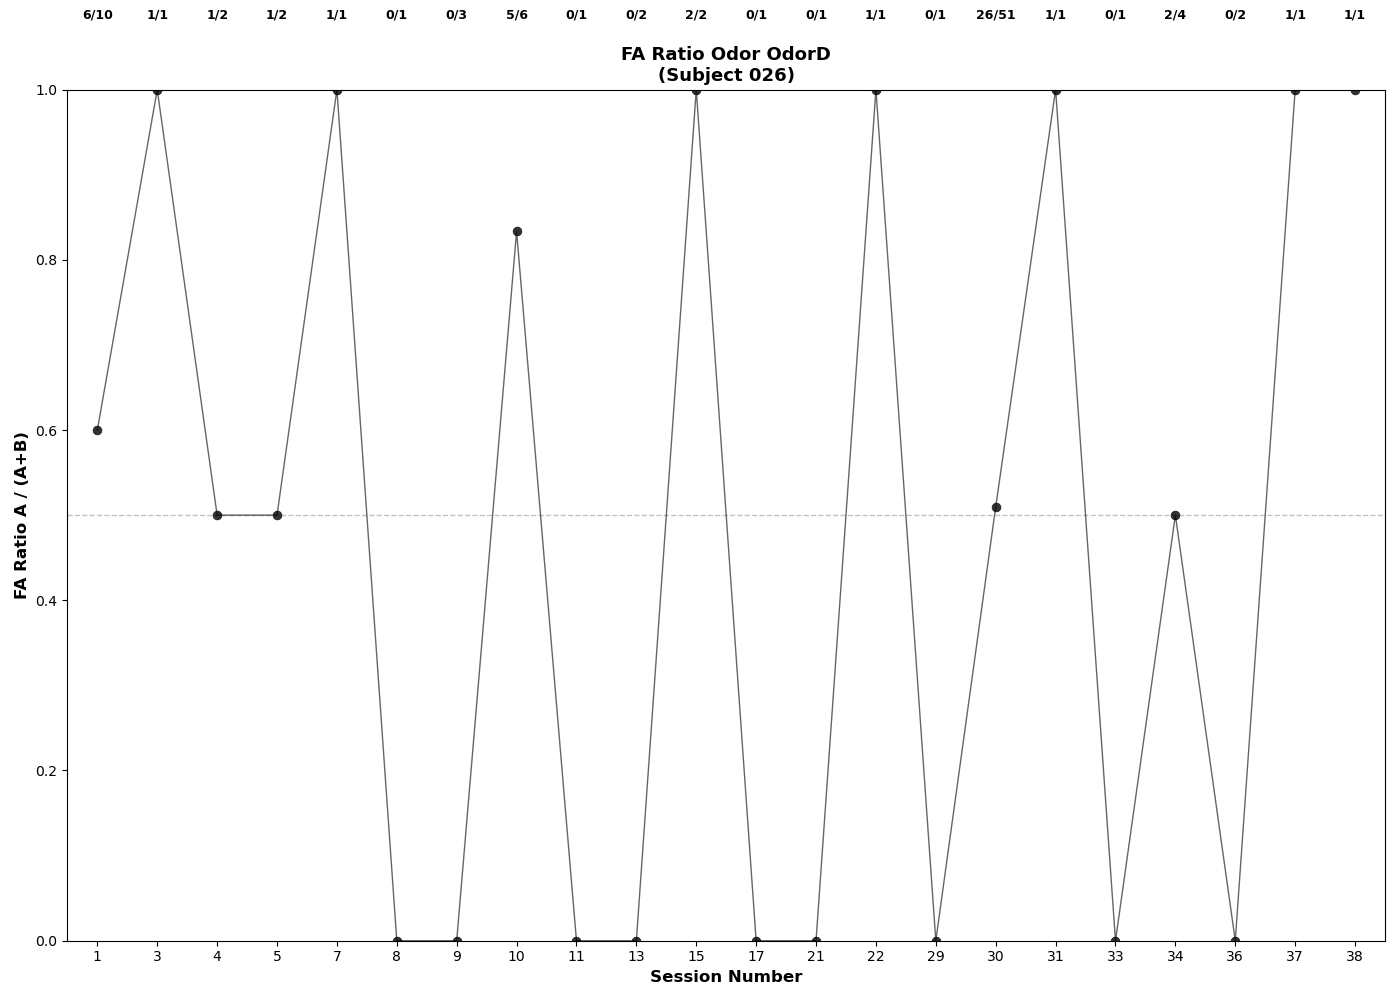

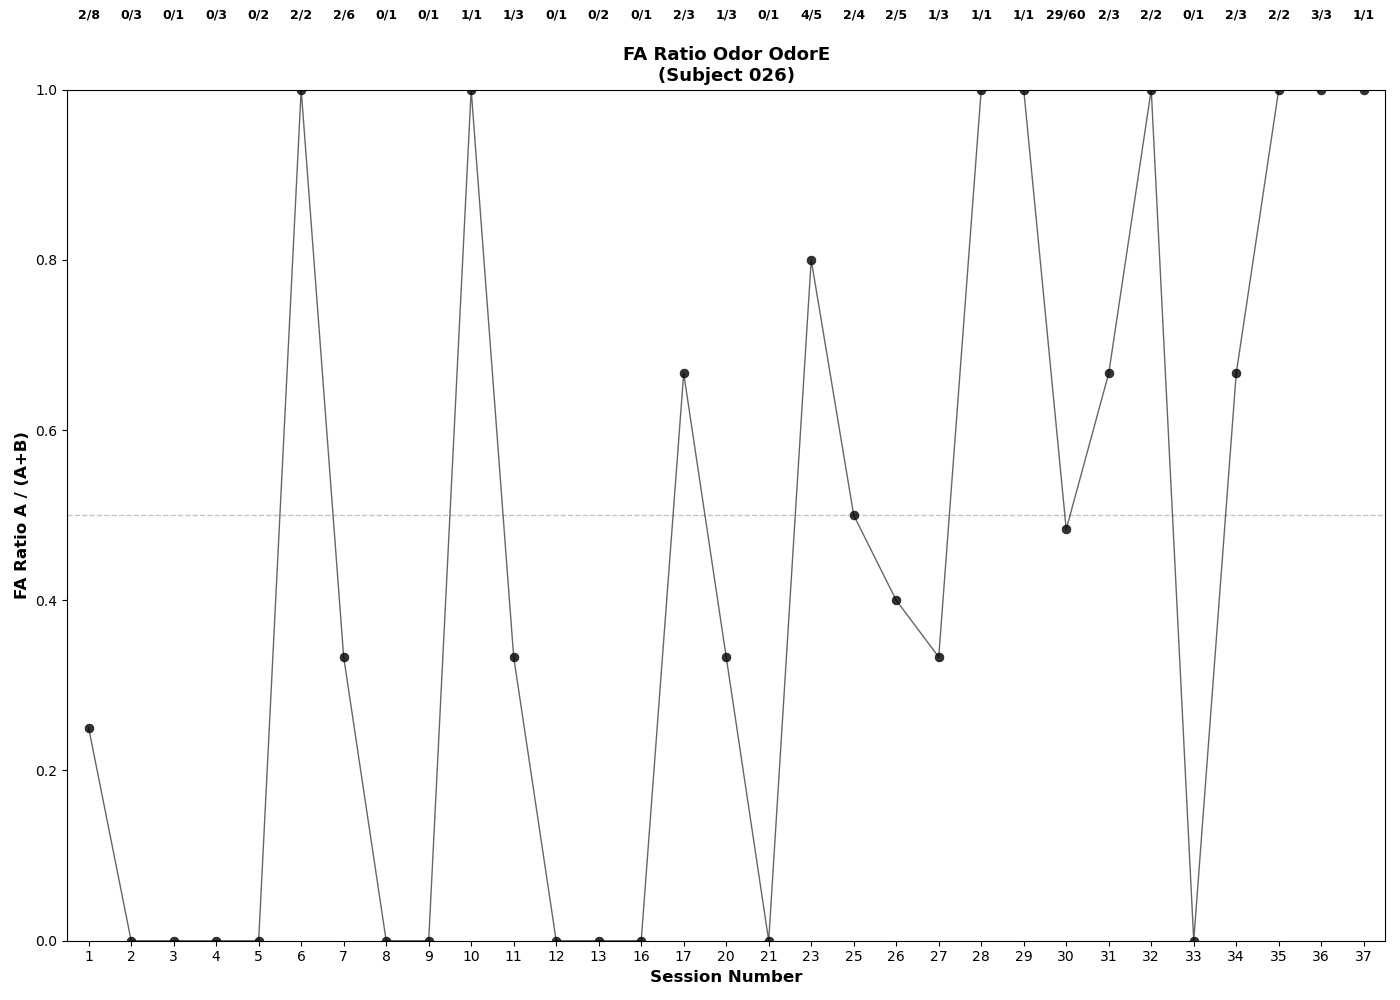

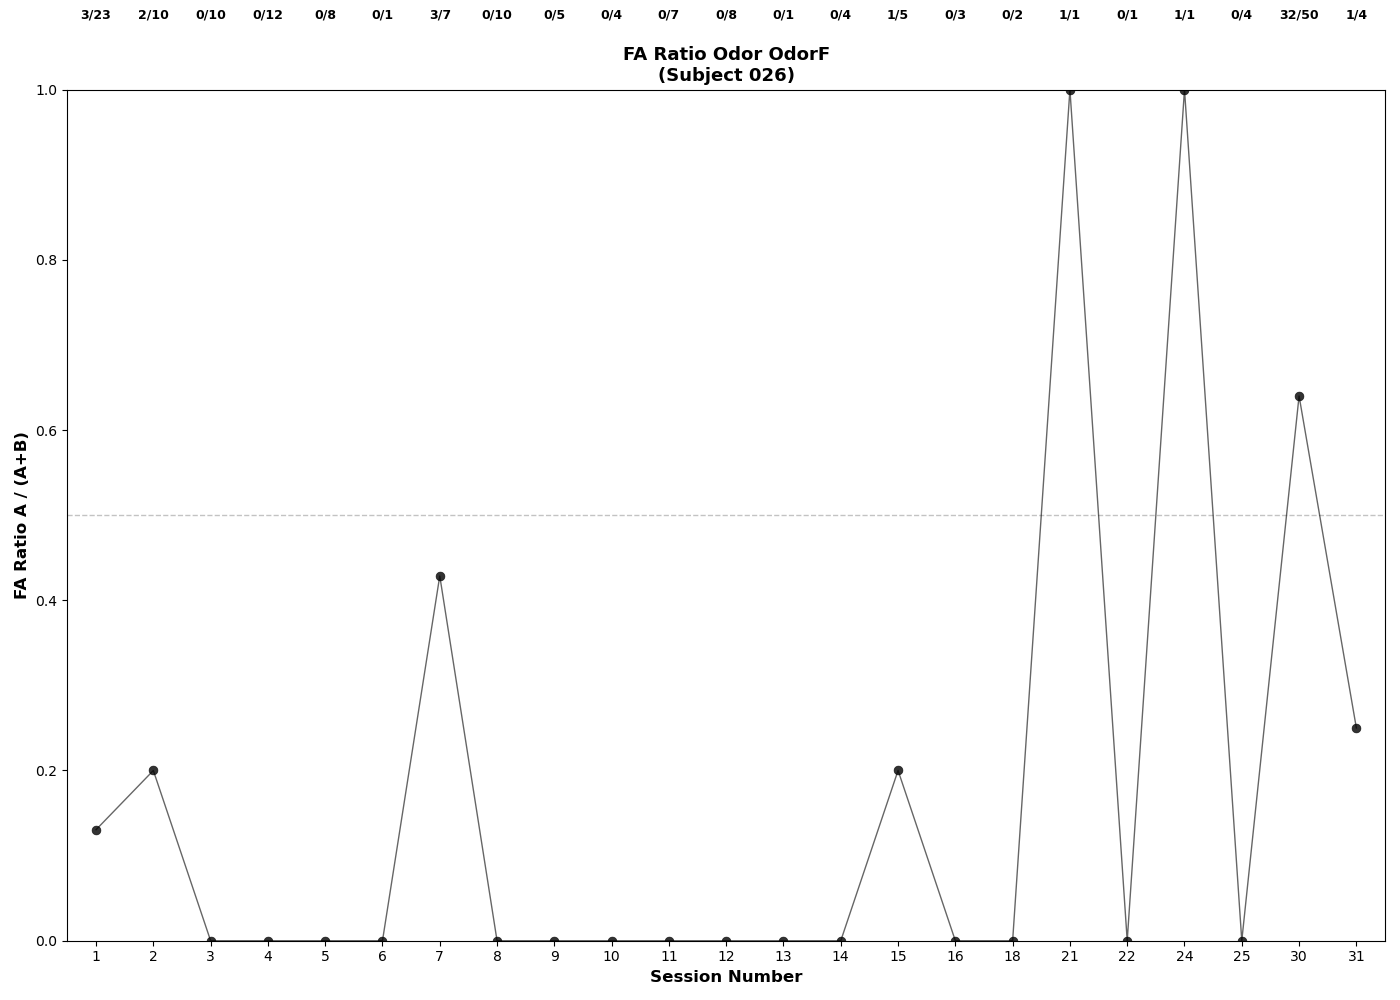

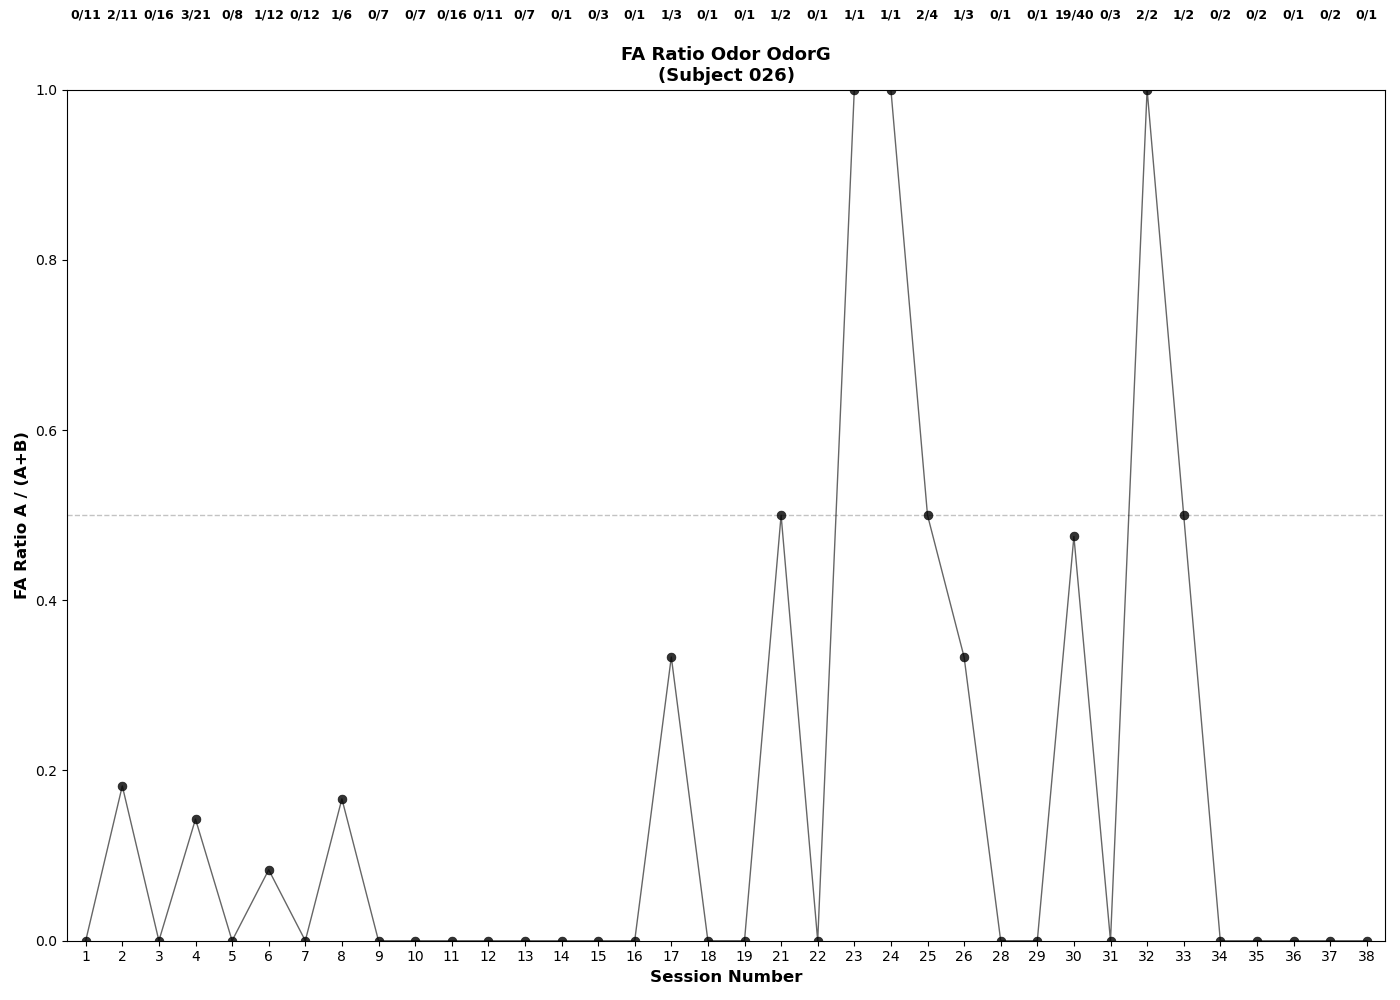

In [28]:
figs = plot_fa_ratio_a_over_sessions(26, dates=(20250811, 20251010))

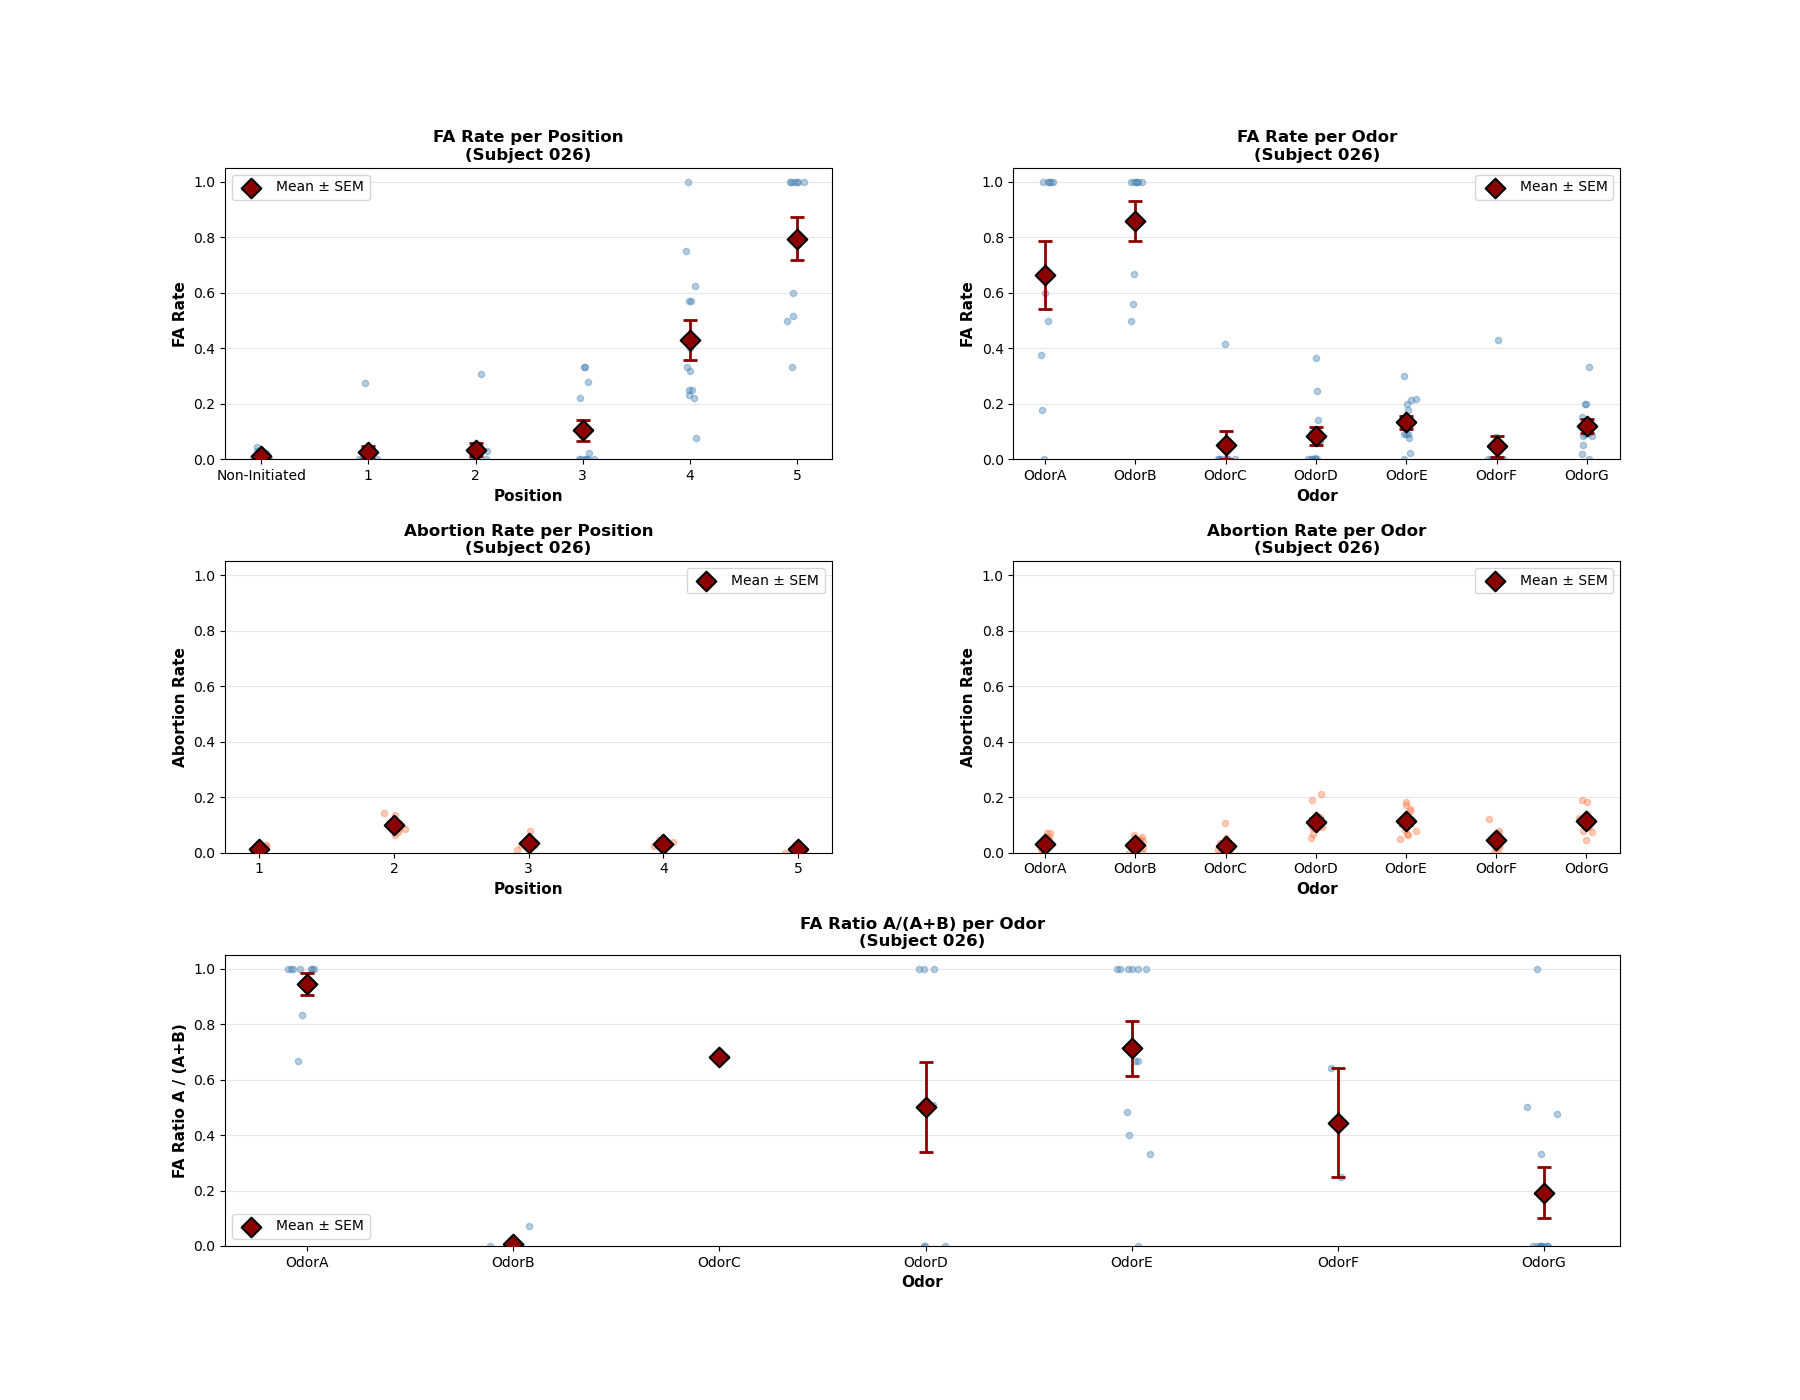

In [16]:
fig, axes = plot_abortion_and_fa_rates(26, dates=(20250916, 20251010), include_noninitiated_in_fa_odor=False, fa_types='FA_time_in')

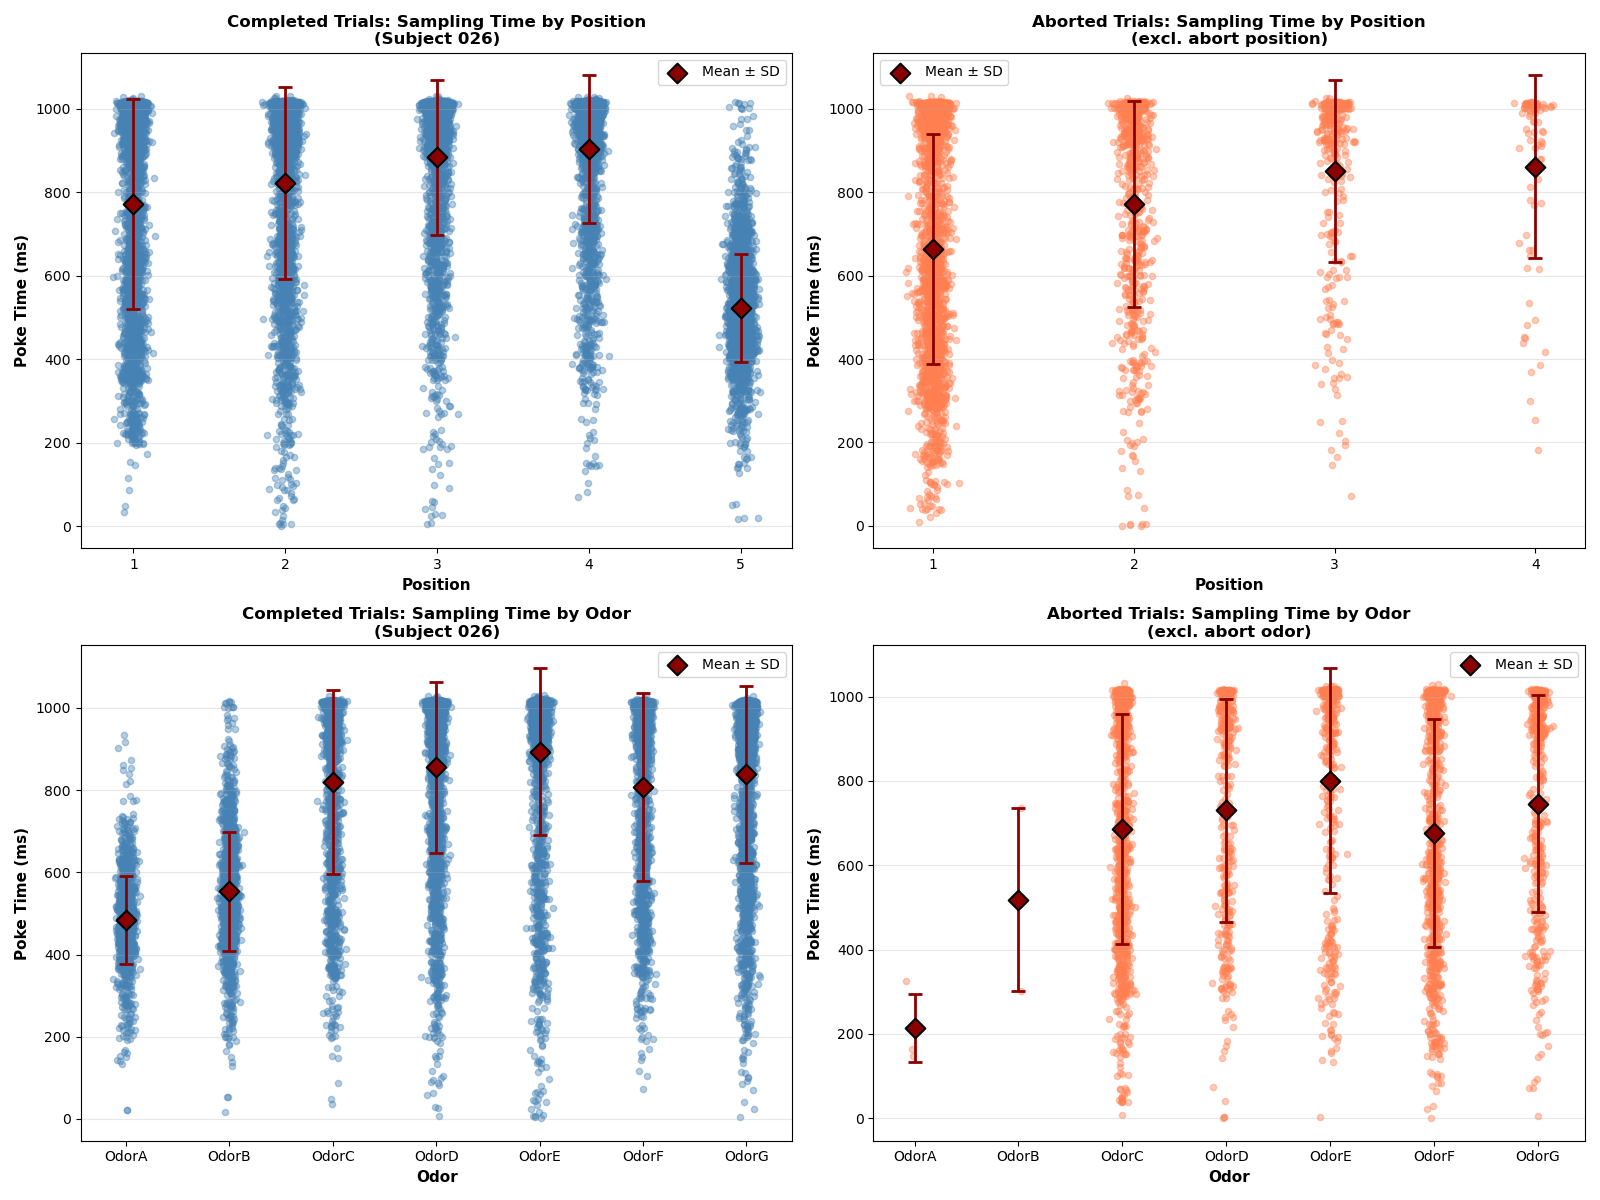

In [12]:
fig, axes = plot_sampling_times_analysis(26, dates=(20250916, 20251010))

In [ ]:
fig, ax = plot_decision_accuracy_by_odor(26, dates=(20250811, 20251010), plot_choice_acc=True)

In [ ]:
figs = plot_behavior_metrics(
    subjids=[26],
    dates=(20250812, 20250904),
    variables=[
        "hidden_rule_detection_rate"
    ],
    protocol_filter=None,
    compute_if_missing=False, 
    verbose=True
)

# 2. Behavior / Movement analysis

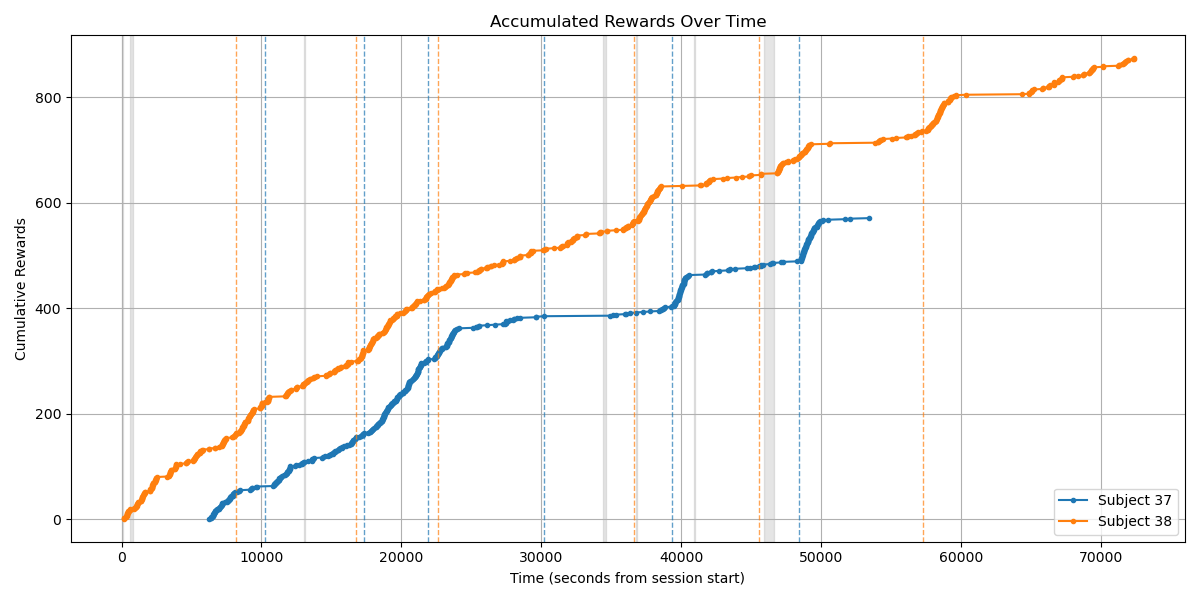

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Accumulated Rewards Over Time'}, xlabel='Time (seconds from session start)', ylabel='Cumulative Rewards'>)

In [5]:
plot_cumulative_rewards(subjids=[37, 38], dates=(20251028, 20251105), split_days=False)

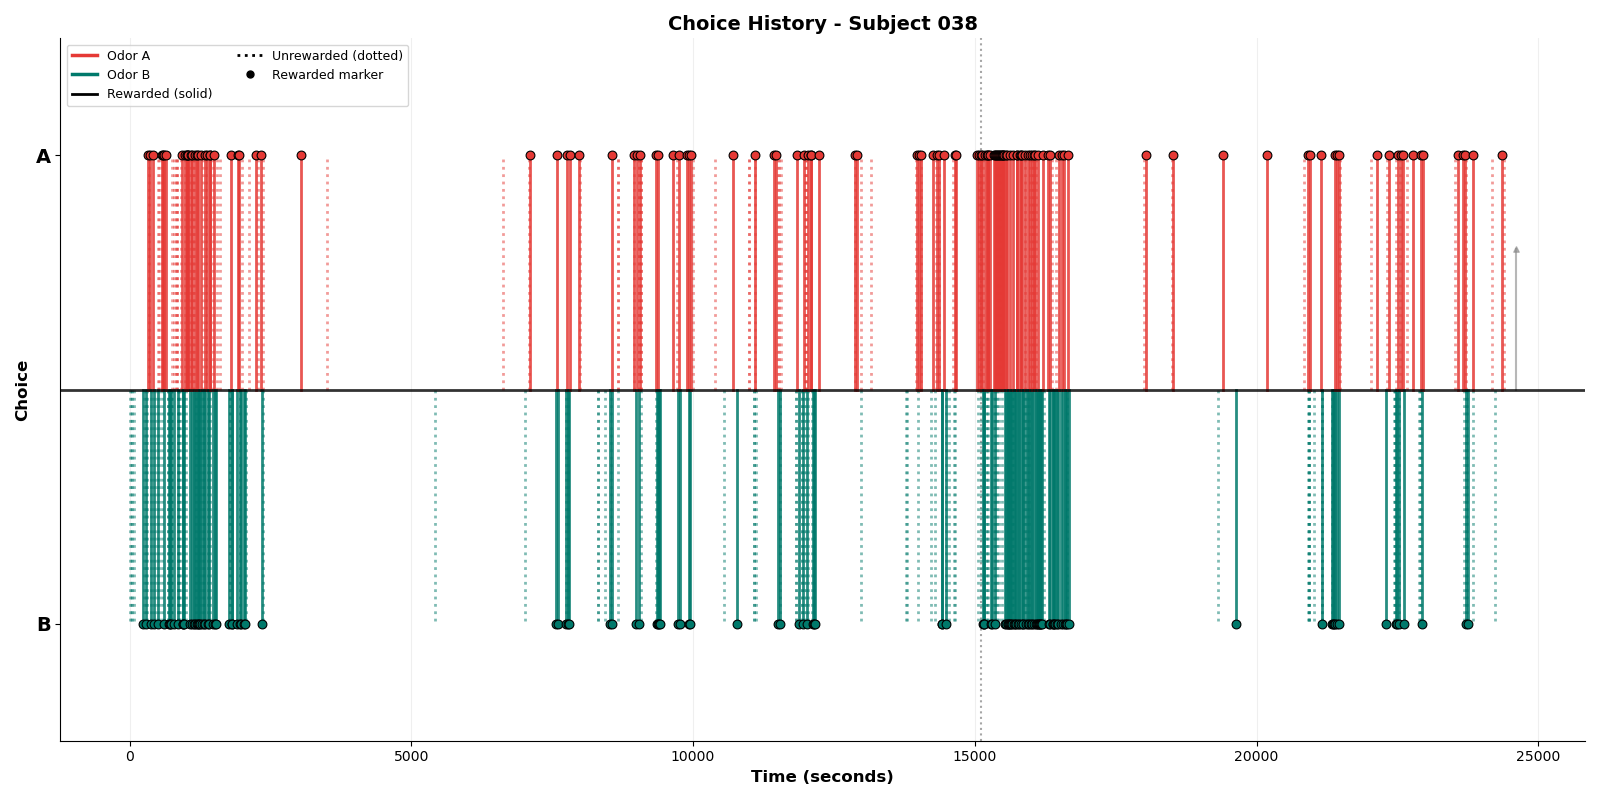

In [42]:
choice_plots = plot_choice_history(subjid=38, dates=[20251105, 20251107])

Loaded SLEAP tracking: 284962 frames from sub-038_ses-20251030_combined_sleap_tracking_timestamps.csv


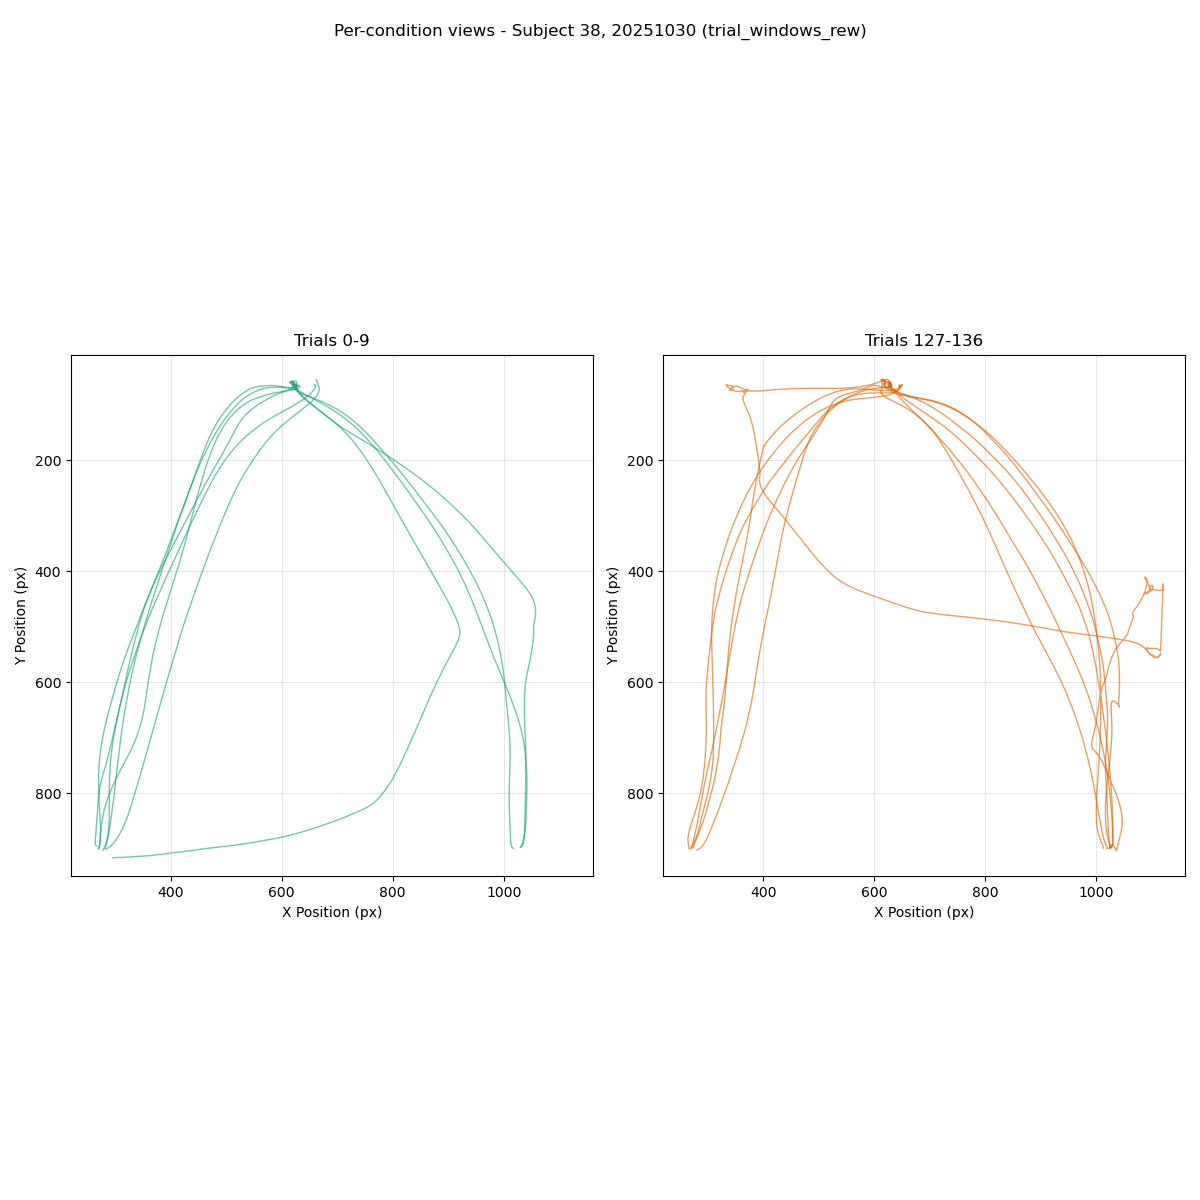

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Movement - Subject 38, 20251030 (trial_windows_rew)'}, xlabel='X Position (pixels)', ylabel='Y Position (pixels)'>)

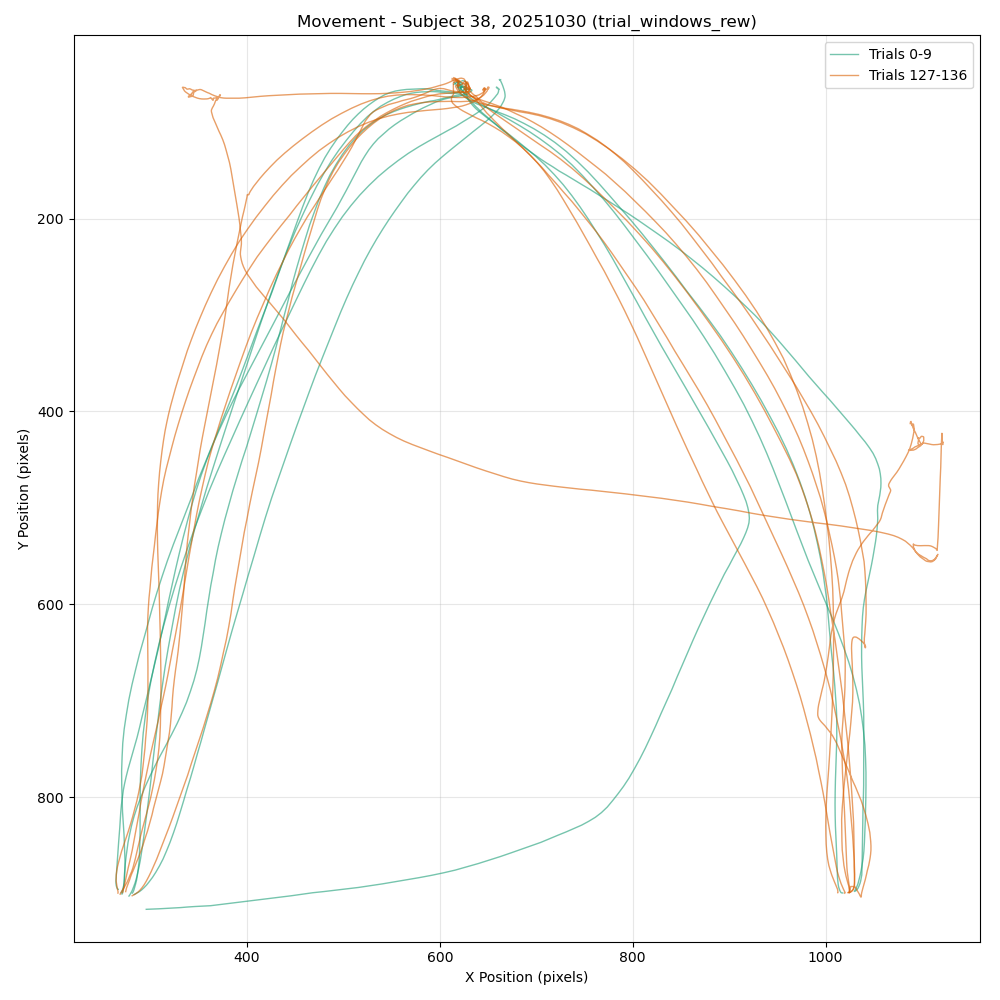

In [34]:
# modes can be simple (all movement), trial_state (within trial vs outside), last_odor (A vs B), trial_windows (one or more trial windows), time_windows (one or more time windows)
# for trial_windows: trial_windows=[(0, 20), (-20, None)] will plot first vs last 20 trials
# for time_windows: time_windows=[("15:20:00","15:25:00"), ("16:00:00","16:05:00")] will plot 2 5-minute windows
plot_movement_with_behavior(38, 20251030, mode='trial_windows_rew', trial_windows=[(0, 10), (-10,None)], xlim=(220,1160), ylim=(10,950))


In [43]:
plt.close('all')

In [10]:
tracking_times = add_timestamps_to_sleap_tracking(38, 20251029)

Found 3 SLEAP tracking file(s)
Found 1 experiment folder(s)
  Loaded 515690 frames from experiment 0
Total: 515,690 frames from 3 video file(s)

Video files in order:
  1. VideoData_1904-01-02T03-00-00.avi
  2. VideoData_1904-01-02T04-00-00.avi
  3. VideoData_1904-01-02T05-00-00.avi
Matched sleap_tracking_video1.csv (video 1) to VideoData_1904-01-02T03-00-00.avi
Matched sleap_tracking_video2.csv (video 2) to VideoData_1904-01-02T04-00-00.avi
Matched sleap_tracking_video3.csv (video 3) to VideoData_1904-01-02T05-00-00.avi

Processing sleap_tracking_video1.csv:
  SLEAP frames: 0 - 197941 (177154 rows)
  Video local frames: 0 - 197941
  Matched 177154/177154 frames to timestamps

Processing sleap_tracking_video2.csv:
  SLEAP frames: 0 - 215805 (162883 rows)
  Video local frames: 0 - 216009
  Matched 162883/162883 frames to timestamps

Processing sleap_tracking_video3.csv:
  SLEAP frames: 163 - 101737 (76733 rows)
  Video local frames: 0 - 101737
  Matched 76733/76733 frames to timestamps


In [3]:
# Annotate Videos with SLEAP Tracking (also adds timestamps and frame numbers)

output_videos = annotate_videos_with_sleap_and_trials(
    subjid=38, 
    date=20251029,
    centroid_radius=8,  
    centroid_color='red'
)

Loaded combined timestamps: 416770 frames
Loaded 216 trials

Processing video 1/3: VideoData_1904-01-02T03-00-00.avi
  Found 177154 frames with timestamps
  Video: 1280x1024 @ 60.0 fps, 197942 frames
  Saving to: sleap_visualization_video1.mp4


  Encoding:   0%|          | 399/197942 [00:03<27:15, 120.76frames/s]


KeyboardInterrupt: 

# Debugging
